# <font color='#1D4ACF'> <u><h3 align="center">Credit Card Fraud Detection</font></h3> </u>

<font color='grey'> Submitted By: Avinash Waghole <br>Email: avinashwaghole@gmail.com </font>

In [89]:
#Print current system time
from datetime import datetime
start_time = datetime.now()
print(start_time)

2021-05-03 12:07:11.600474


<font color='#8E44AD'>**Problem Statement:** <br> Predict fraudulent credit card transactions with the help of machine learning models.

Kaggle Problem statement link: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

**Importing all the necessary libraries**

In [46]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd

# Visualization
from matplotlib.pyplot import xticks
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix,roc_auc_score,accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMModel,LGBMClassifier

from scipy.stats import norm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from collections import Counter
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import GridSearchCV,StratifiedKFold

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

import calendar

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [47]:
# Trigger garbage collection
import gc
gc.collect()

44

**System Details**

In [48]:
# Get available RAM from Colab Pro
def getRAMdetails():  
  from psutil import virtual_memory
  ram_gb = virtual_memory().total / 1e9
  print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

  if ram_gb < 20:
    print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
    print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
    print('re-execute this cell.')
  else:
    print('You are using a high-RAM runtime!')


#System Information
def getSystemInfo():  
  import platform  
  my_system = platform.uname()  
  print(f"System: {my_system.system}")
  print(f"Node Name: {my_system.node}")
  print(f"Release: {my_system.release}")
  print(f"Version: {my_system.version}")
  print(f"Machine: {my_system.machine}")
  print(f"Processor: {my_system.processor}")

In [49]:
getRAMdetails()
getSystemInfo()

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.
System: Linux
Node Name: c9d64ac1bfba
Release: 4.19.112+
Version: #1 SMP Thu Jul 23 08:00:38 PDT 2020
Machine: x86_64
Processor: x86_64


In [50]:
def mountGoogleDrive():
  #import drive
  from google.colab import drive
  #mound google drive
  drive.mount('/gdrive')

In [51]:
mountGoogleDrive()
baseDirPath='/gdrive/My Drive/Upgrad/ML/'
#create dataframe from dataset
filepath=baseDirPath + 'creditcard.csv'
creditcard=pd.read_csv(filepath)


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [52]:
#dataframe header
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's explore dataframes

In [53]:
#get no of rows and columns in dataframe
creditcard.shape

(284807, 31)

We have total 31 columns in dataset.
- (V1, V2, V3, up to V28) are the principal components obtained using PCA
- Time
- Amount
- Class - Target variable

In [54]:
#dataframe info
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

'Class' variable is int, all other are float.

Let's check missing values

In [55]:
#Check for missing values
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing value in any column. We can continue with our analysis.

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis using available features and look for patterns.

In [56]:
#Value counts
creditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

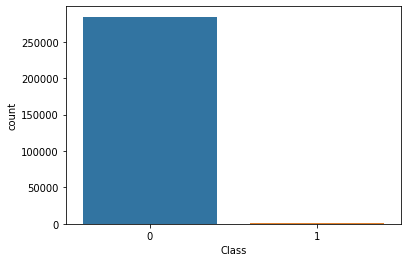

In [57]:
#Count plot for Class
sns.countplot(x='Class',data=creditcard)

The dataset is imbalanced looking at 'Class' variable.

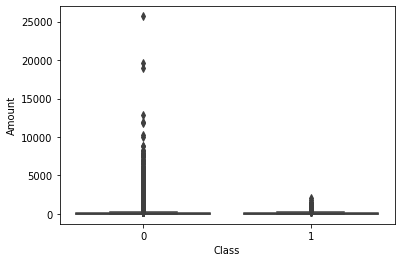

In [58]:
#boxplot to compare amount based on Class
sns.boxplot(x='Class',y='Amount',data=creditcard)

Amout for fraud transaction is less compared to normal transactions.

In [59]:
#Let's create 2 dataframes, one for fraut transacations and one for other
#fraud_transactions
fraud_transactions=creditcard[creditcard['Class']==1]
#normal_transactions
normal_transactions=creditcard[creditcard['Class']==0]


Let's describe amount column
- Normal Transactions

In [60]:
#Describe Amount
normal_transactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

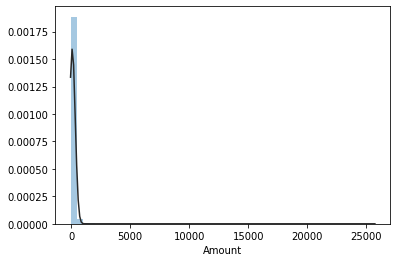

In [61]:
#normal transactions
ax = sns.distplot(normal_transactions['Amount'], fit=norm, kde=False)

In [62]:
normal_transactions['Amount'].quantile([.80, .85, 0.90,.95,0.96,0.97])

0.80    100.0000
0.85    139.9800
0.90    202.7240
0.95    364.4090
0.96    433.1288
0.97    524.8248
Name: Amount, dtype: float64

There are 96% normal transaction having amount below 500.

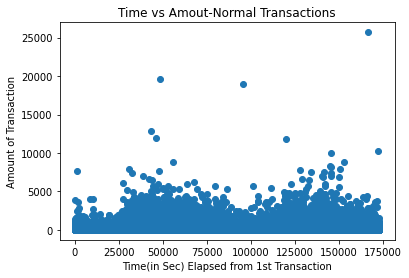

In [63]:
#Scatter plot for Amount vs Time for Normal tranactions
plt.scatter(normal_transactions['Time'], normal_transactions['Amount'])
#title
plt.title("Time vs Amout-Normal Transactions")
#labels
plt.xlabel('Time(in Sec) Elapsed from 1st Transaction')
plt.ylabel('Amount of Transaction')
plt.show()

- Fraud Transactions

In [64]:
#Describe Amount
fraud_transactions.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

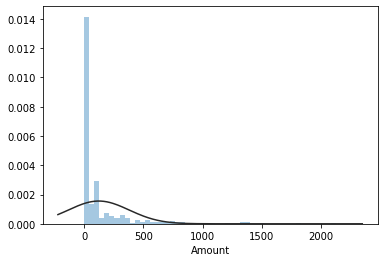

In [65]:
#fraud transactions
ax = sns.distplot(fraud_transactions['Amount'], fit=norm, kde=False)

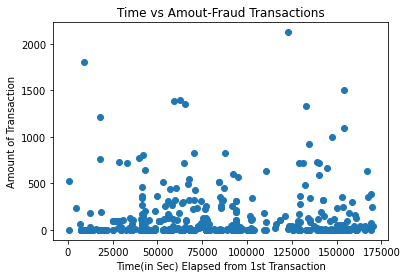

In [66]:
#Scatter plot for Amount vs Time for Fraud tranactions
plt.scatter(fraud_transactions['Time'], fraud_transactions['Amount'])
#title
plt.title("Time vs Amout-Fraud Transactions")
#labels
plt.xlabel('Time(in Sec) Elapsed from 1st Transaction')
plt.ylabel('Amount of Transaction')
plt.show()

There is no pattern inbetween Time and Amount for fraud transactions.

Let's plot heatmap to see correlations

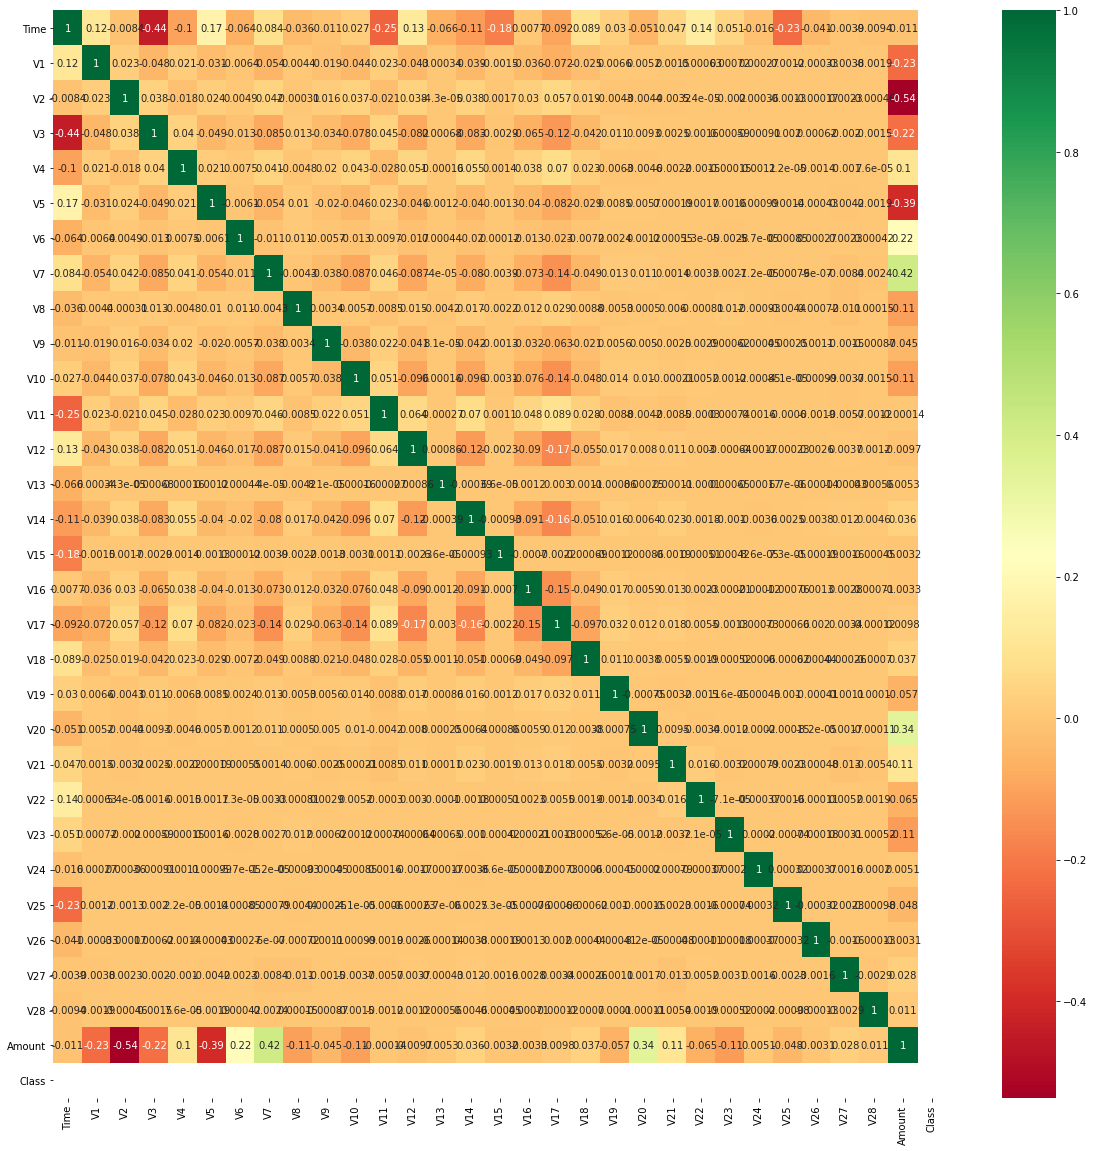

In [67]:
#normal_transactions
plt.figure(figsize=(20,20))
g=sns.heatmap(normal_transactions.corr(),annot=True,cmap="RdYlGn")

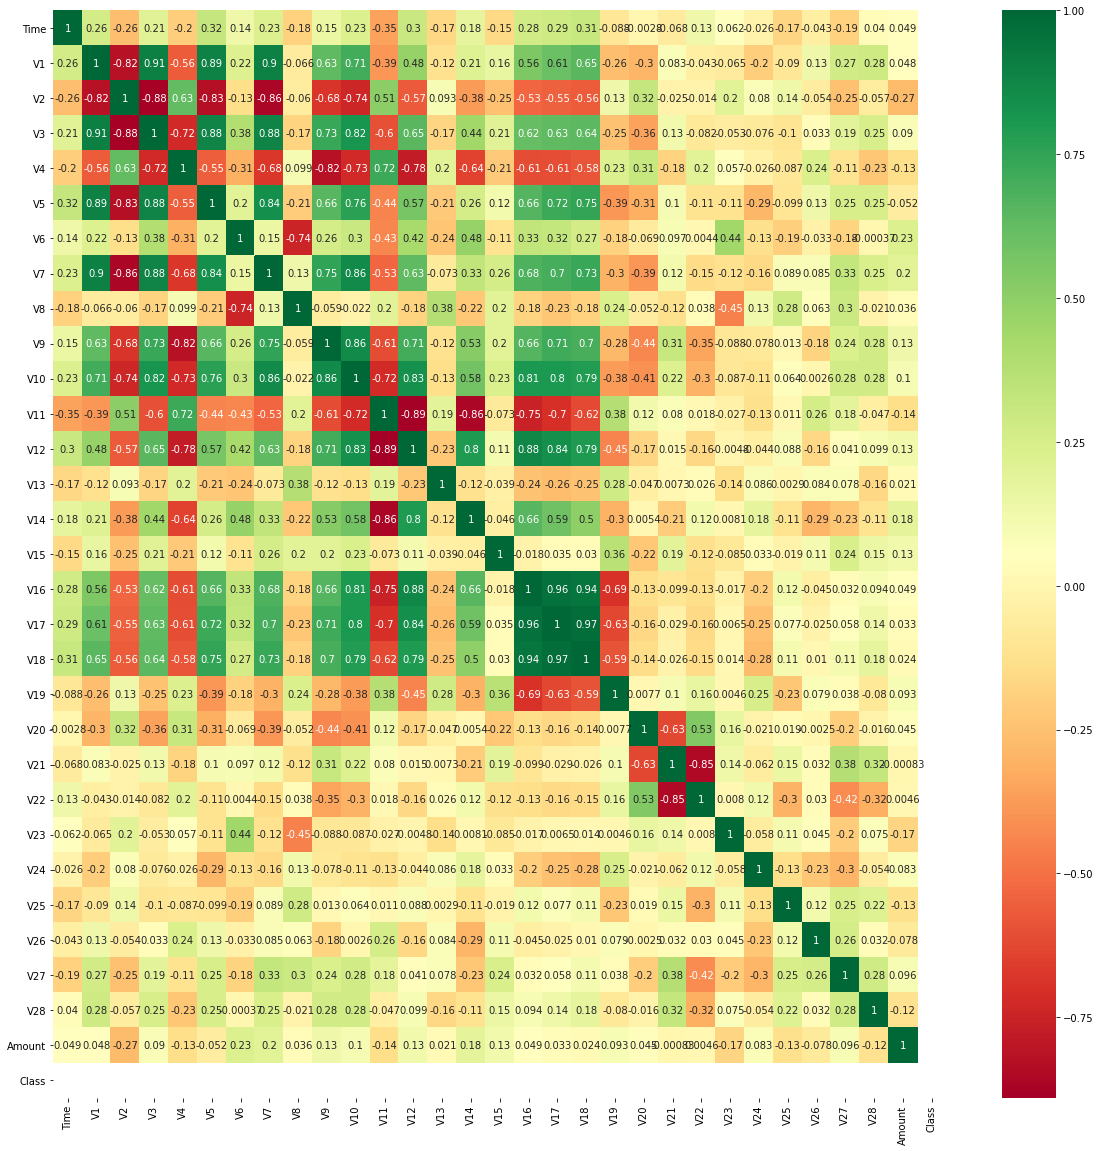

In [68]:
#fraud_transactions
plt.figure(figsize=(20,20))
g=sns.heatmap(fraud_transactions.corr(),annot=True,cmap="RdYlGn")

We see high correletions among some predictors as shown in dark green color.

Given Time is time elapsed from first transation within given dataset. We don't need 'Time' variable, let's drop it .

In [69]:
#We don't need 'Time' variable, let's drop it 
creditcard.drop(columns=['Time'],inplace=True)
creditcard.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


'Time' column is removed.

### Data Preparation

In [70]:
# Putting feature variable to X
X = creditcard.drop(['Class'], axis=1)

# Putting response variable to y
y = creditcard['Class']

In [71]:
#stratify splitting of train-test into 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3,random_state=42)

Let's check value counts for 'Class' in train and test split.

In [72]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [73]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

Dataset is splitted into test train split in equal ratio of 'Class'

Let's check skewness in dataset

In [74]:
#Skewness in train data
skewValue = X_train.skew(axis=0)
print(skewValue)

V1        -3.350182
V2        -4.834316
V3        -2.322368
V4         0.698531
V5        -3.127732
V6         2.025515
V7         3.646023
V8        -8.851522
V9         0.546540
V10        1.092815
V11        0.372803
V12       -2.359216
V13        0.062582
V14       -2.026111
V15       -0.311842
V16       -1.113892
V17       -3.867831
V18       -0.258044
V19        0.114026
V20       -2.226351
V21        3.452233
V22       -0.220427
V23       -6.168663
V24       -0.549984
V25       -0.414398
V26        0.576731
V27       -0.690027
V28       10.618027
Amount    18.888550
dtype: float64


We see some skewness in train set.

In [75]:
# Function to plot displot for all columns in dataframe
def plotDistribution(df):
  plt.figure(figsize=(20, 14))
  left = 0.125  # the left side of the subplots of the figure
  right = 0.9   # the right side of the subplots of the figure
  bottom = 0.2  # the bottom of the subplots of the figure
  top = 0.5    
  wspace = 0.7
              
  hspace = 0.7
  plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
  plt.figure(1)
  i=1
  for col in df.columns:
    plt.subplot(3,10,i)
    ax = sns.distplot(df[col], kde=True)    
    i=i+1


Skewness on X_train


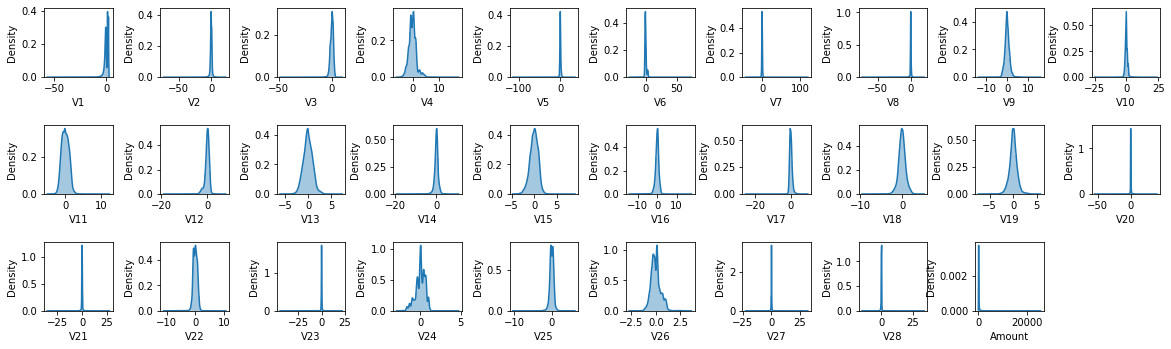

In [76]:
print("Skewness on X_train")
plotDistribution(X_train)

Amount and V28 columns are having very higher skewness. Other predictors are also having some skeness.

In [77]:
#Skewness in test data
skewValue = X_test.skew(axis=0)
print(skewValue)

V1        -3.111892
V2        -4.114515
V3        -2.043557
V4         0.624087
V5        -0.700993
V6         1.346905
V7        -0.245047
V8        -7.722958
V9         0.573705
V10        1.410608
V11        0.318416
V12       -2.087125
V13        0.071315
V14       -1.922351
V15       -0.300460
V16       -1.070896
V17       -3.792517
V18       -0.264193
V19        0.097865
V20       -1.559496
V21        3.945507
V22       -0.196443
V23       -5.183190
V24       -0.558321
V25       -0.419053
V26        0.576613
V27       -2.410665
V28       12.516618
Amount    11.918313
dtype: float64


Skewness on X_test


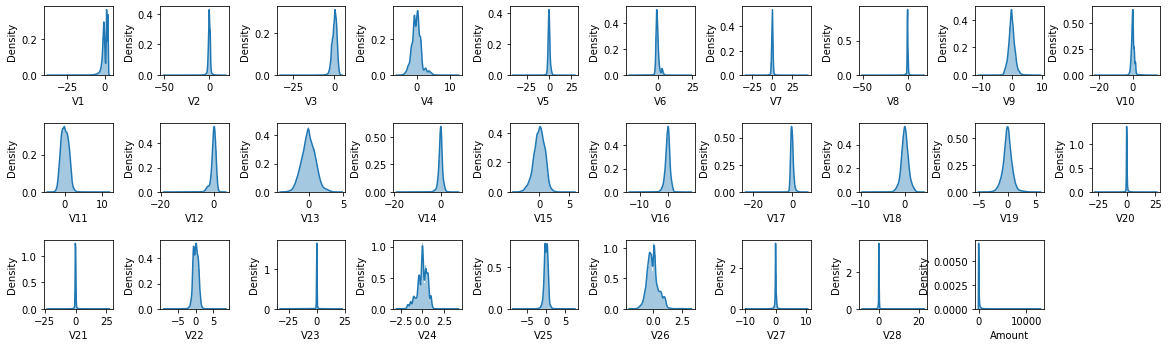

In [78]:
#plot distplots
print("Skewness on X_test")
plotDistribution(X_test)

Amount and V28 columns are having very higher skewness. Other predictors are also having some skeness.

We can see some skewness in X_train and X_test, Let's use  PowerTransformer to minimize skewness

In [79]:
#Will use 'yeo-johnson' method as it works with positive and negative values
yj = PowerTransformer(method='yeo-johnson')
#fit transform X_train
X_train_yj=yj.fit_transform(X_train)
#Convert to dataframe
X_train=pd.DataFrame(X_train_yj,columns=X_train.columns)

#fit transform X_test
X_test_yj=yj.fit_transform(X_test)
#Convert to dataframe
X_test=pd.DataFrame(X_test_yj,columns=X_test.columns)


In [80]:
#Skewness in train data
skewValue = X_train.skew(axis=0)
print(skewValue)

V1       -0.218191
V2        0.345089
V3       -0.079358
V4        0.020973
V5       -1.400488
V6       -2.052875
V7        3.029484
V8        2.433661
V9       -0.050119
V10      -1.323844
V11       0.064524
V12       0.165588
V13       0.006479
V14       0.102421
V15       0.014268
V16       0.175757
V17      -0.782887
V18      -0.058963
V19       0.015075
V20      -0.789266
V21      -2.150183
V22      -0.025827
V23      -0.352105
V24       0.112865
V25       0.080411
V26      -0.024380
V27       3.854543
V28       1.034612
Amount    0.018218
dtype: float64


Skewness on X_train


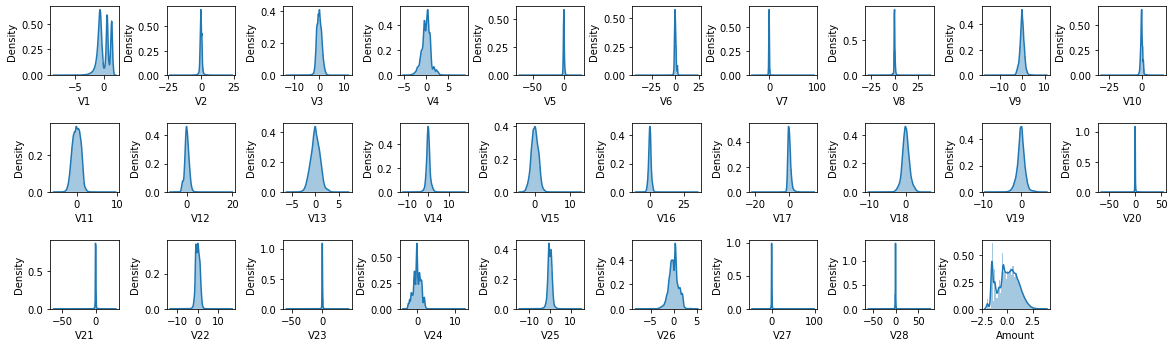

In [81]:
print("Skewness on X_train")
plotDistribution(X_train)

In [82]:
#Skewness in test data
skewValue = X_test.skew(axis=0)
print(skewValue)

V1       -0.217445
V2        0.315564
V3       -0.080861
V4        0.013783
V5       -0.385783
V6       -1.582956
V7        0.749292
V8        2.018133
V9       -0.043794
V10      -1.285184
V11       0.052037
V12       0.143877
V13       0.005331
V14       0.113334
V15       0.010673
V16       0.036349
V17      -0.810196
V18      -0.061228
V19       0.015576
V20      -1.161364
V21      -1.440832
V22      -0.025032
V23      -0.002547
V24       0.111618
V25       0.072005
V26      -0.023457
V27       1.124809
V28       1.305022
Amount    0.018673
dtype: float64


Skewness on X_test


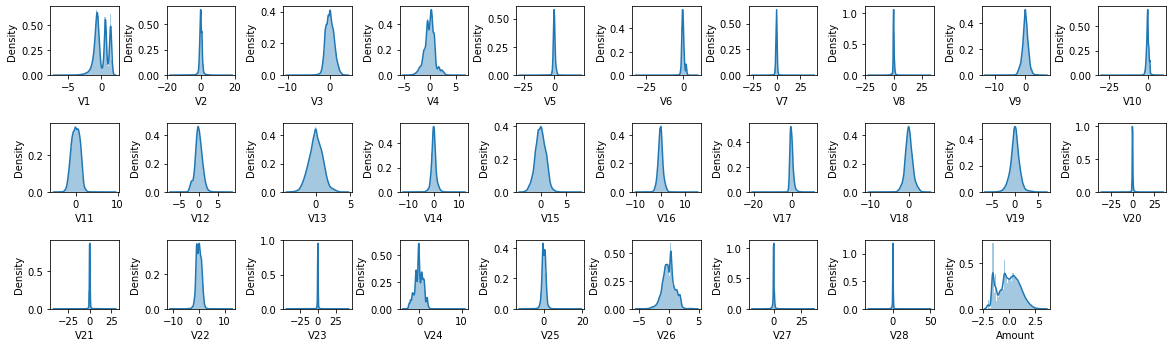

In [83]:
print("Skewness on X_test")
plotDistribution(X_test)

We have handled skewness in both train and test sets. We are getting normal distribution in dataset.

In [84]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05
mean,7.388716e-18,1.891562e-17,-4.494264e-17,-3.601136e-17,-1.232012e-17,-1.425132e-17,2.710709e-17,-1.337446e-17,1.624687e-17,9.396834e-18,5.609553e-17,5.510017e-17,-1.383853e-18,-3.972242e-17,-2.652097e-17,-1.578427e-17,1.686407e-17,-3.198732e-18,-3.619095e-17,-3.428029e-18,6.582350e-19,2.329049e-17,4.283957e-18,3.603363e-17,1.891952e-17,-5.146095e-17,-1.408968e-17,-4.980756e-18,-7.334848e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-8.423142e+00,-2.352211e+01,-1.293327e+01,-5.035996e+00,-7.147724e+01,-4.167707e+01,-3.564496e+01,-2.767072e+01,-1.630065e+01,-3.115911e+01,-5.435324e+00,-7.229701e+00,-6.024748e+00,-1.221905e+01,-4.162010e+00,-1.031976e+01,-2.151013e+01,-1.000683e+01,-9.317074e+00,-6.559286e+01,-6.222180e+01,-1.327545e+01,-5.840873e+01,-3.539515e+00,-1.465122e+01,-8.026848e+00,-4.568541e+01,-6.006735e+01,-2.014105e+00
25%,-7.225495e-01,-4.534914e-01,-7.121168e-01,-5.677066e-01,-5.087889e-01,-5.565302e-01,-4.418839e-01,-2.757492e-01,-5.605366e-01,-4.737027e-01,-7.340555e-01,-5.868081e-01,-6.463930e-01,-5.180207e-01,-6.719440e-01,-5.974130e-01,-6.046972e-01,-6.067252e-01,-5.532485e-01,-2.754652e-01,-3.009014e-01,-7.556592e-01,-2.735518e-01,-6.601130e-01,-6.327912e-01,-6.496852e-01,-1.844458e-01,-1.545649e-01,-7.457231e-01
50%,-2.500047e-01,-4.192011e-02,-2.492247e-02,6.338947e-02,-5.346213e-02,-1.158032e-01,3.494816e-02,-5.506119e-02,5.449009e-03,-4.744744e-02,1.574213e-02,-1.924093e-02,-3.839070e-03,-2.474042e-02,-4.733570e-03,1.048259e-04,-1.180129e-01,-2.455303e-02,1.549497e-02,-8.377897e-02,-2.352486e-02,-1.228170e-02,-2.987297e-02,-2.908085e-02,-6.087259e-03,-1.754824e-02,-6.842957e-03,4.421625e-02,2.568798e-02
75%,7.350218e-01,4.762444e-01,6.730424e-01,5.836669e-01,4.323553e-01,4.099482e-01,4.591928e-01,2.565753e-01,5.827192e-01,4.538194e-01,7.460902e-01,6.094812e-01,6.706384e-01,4.840514e-01,6.915726e-01,5.677355e-01,4.581235e-01,5.843497e-01,5.695240e-01,1.687240e-01,2.710607e-01,7.205103e-01,2.280991e-01,7.060150e-01,6.581175e-01,5.777305e-01,2.157626e-01,2.502191e-01,7.497848e-01
max,1.865925e+00,2.350533e+01,1.147201e+01,8.501222e+00,2.779986e+01,2.346877e+01,9.392283e+01,3.804417e+01,1.077233e+01,1.651112e+01,9.436046e+00,1.976240e+01,6.904504e+00,1.767117e+01,1.281489e+01,3.502055e+01,1.412826e+01,6.495948e+00,6.558135e+00,5.410452e+01,2.960456e+01,1.644871e+01,4.250414e+01,1.238716e+01,1.493682e+01,4.936779e+00,9.830702e+01,7.736510e+01,3.678522e+00


In [85]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04,8.544300e+04
mean,5.903050e-17,1.849722e-17,-2.254412e-18,-1.795733e-18,8.461840e-18,1.117396e-17,-6.897720e-18,-7.677409e-17,-1.000647e-17,4.369660e-17,2.456009e-17,6.741146e-18,1.355506e-17,2.255191e-17,-1.047814e-17,3.781564e-17,-2.784816e-17,-2.885647e-17,1.489341e-17,-6.592611e-18,-1.951723e-17,3.486737e-17,-5.804298e-18,-3.449835e-18,-2.154490e-17,-2.428787e-17,-5.240727e-17,1.101218e-19,3.142793e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-6.818742e+00,-1.798355e+01,-1.001149e+01,-4.899602e+00,-2.846385e+01,-3.198279e+01,-2.562040e+01,-2.206286e+01,-1.297935e+01,-2.997474e+01,-4.988308e+00,-7.245825e+00,-3.979874e+00,-1.189409e+01,-3.890134e+00,-9.731247e+00,-2.060374e+01,-1.020344e+01,-6.272253e+00,-3.626266e+01,-4.142091e+01,-1.103497e+01,-4.424749e+01,-3.515228e+00,-1.261072e+01,-5.234654e+00,-1.943585e+01,-3.285527e+01,-2.010465e+00
25%,-7.238038e-01,-4.537352e-01,-7.128508e-01,-5.728068e-01,-5.095021e-01,-5.572007e-01,-4.649128e-01,-2.732508e-01,-5.618575e-01,-4.744189e-01,-7.354466e-01,-5.864887e-01,-6.471967e-01,-5.211540e-01,-6.689424e-01,-6.010742e-01,-6.018952e-01,-6.084833e-01,-5.579348e-01,-2.838258e-01,-3.061578e-01,-7.558022e-01,-2.686961e-01,-6.574464e-01,-6.383478e-01,-6.503171e-01,-2.076351e-01,-1.482012e-01,-7.571176e-01
50%,-2.466966e-01,-4.050701e-02,-2.564036e-02,6.246366e-02,-4.393310e-02,-1.089605e-01,2.354308e-02,-5.630567e-02,1.131166e-02,-3.800400e-02,1.157465e-02,-1.734010e-02,-2.086539e-03,-2.347431e-02,-2.918455e-03,-6.023864e-03,-1.157556e-01,-2.669307e-02,1.262024e-02,-8.638037e-02,-2.221295e-02,-7.342843e-03,-2.835696e-02,-3.108652e-02,-9.029954e-03,-1.748704e-02,-2.121177e-02,5.272877e-02,3.013423e-02
75%,7.376139e-01,4.734185e-01,6.754772e-01,5.808483e-01,4.471105e-01,4.225938e-01,4.645492e-01,2.543220e-01,5.822154e-01,4.612942e-01,7.488598e-01,6.098217e-01,6.705492e-01,4.879480e-01,6.886704e-01,5.704002e-01,4.499224e-01,5.927837e-01,5.717696e-01,1.711767e-01,2.816723e-01,7.235050e-01,2.316667e-01,7.059854e-01,6.590138e-01,5.781291e-01,2.125302e-01,2.605454e-01,7.479481e-01
max,1.866171e+00,1.817729e+01,4.122112e+00,6.518737e+00,2.189273e+01,9.730862e+00,3.940179e+01,3.216757e+01,6.750343e+00,9.817342e+00,9.242306e+00,8.483127e+00,4.428444e+00,1.194312e+01,7.663720e+00,1.466968e+01,1.160620e+01,5.291906e+00,6.636028e+00,3.532485e+01,2.965961e+01,1.269098e+01,4.311261e+01,1.046696e+01,1.919354e+01,4.521176e+00,3.632044e+01,5.041666e+01,3.357964e+00


### Model Building on imbalanced dataset

Lets check performances on imbalanced dataset with default model parameters.

In [86]:
#Function to get details on performance measurement
def getPerformanceMeasures(onWhichSet,model,X,y):
    print("Model Performace measurement on ",onWhichSet,' set=>')
    print('-'*50)
    y_pred = model.predict(X)
    #accuracy score
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix: ")
    print(cm)

    y_pred_prob = model.predict_proba(X)[:, 1]
    roc=roc_auc_score(y, y_pred_prob)
    print("ROC AUC: \t", roc)
    accuracy=accuracy_score(y,y_pred)
    print("accuracy score:\t",accuracy)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives

    # checking evaluation metrics
    sensitivity=TP/float(TP+FN)
    print('Sensitivity:\t', sensitivity)
    specificity=TN/float(TN+FP)
    print('Specificity:\t',specificity )
    mcc=matthews_corrcoef(y, y_pred)
    print('MCC:\t\t', mcc)
    print('-'*50)
    return (roc,accuracy,sensitivity,specificity,mcc)
    

In [87]:
#Function to run default models on imbalanced dataset
def getBestModelonDefaultParameters(X_train,y_train,X_test,y_test):
  performance=[]
  classifiers=[]
  classifiers.append(('LogisticRegression',LogisticRegression(random_state=42)))  
  classifiers.append(('LGBM',LGBMClassifier()))
  classifiers.append(('Random Forest',RandomForestClassifier()))
  classifiers.append(('XGB',XGBClassifier()))
  classifiers.append(('NB',GaussianNB()))
  classifiers.append(('HistGradientBoostingClassifier',HistGradientBoostingClassifier()))
  #For each classifier
  for classifier in classifiers:
    gc.collect()
    print("<",'='*25,classifier[0],'='*25,">")
    model_training_start_time = datetime.now()
    print("model_training_start_time:\t" , model_training_start_time)    
    classifier[1].fit(X_train, y_train) 
    model_training_end_time = datetime.now()   
    print("model_training_end_time:\t" , model_training_end_time)
    training_time=model_training_end_time-model_training_start_time
    print(classifier[0],"training time:\t",training_time)
    #predictions on train data
    tr_score=getPerformanceMeasures("train",classifier[1],X_train, y_train)    
    #predictions on test data
    tst_score=getPerformanceMeasures("test",classifier[1],X_test, y_test)  
    #classifier,train roc,train accuracy,train Sensitivity, train Specificity, train MCC,training time, test roc, test accuracy,test Sensitivity, test Specificity, test MCC
    performance.append((classifier[0],tr_score[0],tr_score[1],tr_score[2],tr_score[3],tr_score[4],training_time,tst_score[0],tst_score[1],tst_score[2],tst_score[3],tst_score[4]))

  #create dataframe from results of all classifiers
  df = pd.DataFrame(performance,columns =['Classifier', 'tr_roc','tr_acc','tr_sensi','tr_speci','tr_mcc','tr_time','tst_roc','tst_acc','tst_sensi','tst_speci','tst_mcc'])  
  return df.sort_values(by=['tst_roc'], ascending=False)  

Run Models and get results

In [90]:
#Run models with default parameters on imbalanced dataset
results_default_imbalanced=getBestModelonDefaultParameters(X_train,y_train,X_test,y_test)
results_default_imbalanced

< ========================= LogisticRegression ========================= >
model_training_start_time:	 2021-05-03 12:07:18.555089
model_training_end_time:	 2021-05-03 12:07:20.010226
LogisticRegression training time:	 0:00:01.455137
Model Performace measurement on  train  set=>
--------------------------------------------------
Confusion Matrix: 
[[198993     27]
 [   115    229]]
ROC AUC: 	 0.9858432189823156
accuracy score:	 0.9992877349972914
Sensitivity:	 0.6656976744186046
Specificity:	 0.9998643352426891
MCC:		 0.7713505064618275
--------------------------------------------------
Model Performace measurement on  test  set=>
--------------------------------------------------
Confusion Matrix: 
[[85278    17]
 [   55    93]]
ROC AUC: 	 0.9653473715229972
accuracy score:	 0.9991573329588147
Sensitivity:	 0.6283783783783784
Specificity:	 0.9998006917169823
MCC:		 0.7284860791728878
--------------------------------------------------
< ========================= LGBM ===================

,Classifier,tr_roc,tr_acc,tr_sensi,tr_speci,tr_mcc,tr_time,tst_roc,tst_acc,tst_sensi,tst_speci,tst_mcc
3,XGB,0.997712,0.999689,0.848837,0.999950,0.905792,0 days 00:00:33.730593,0.965660,0.999427,0.770270,0.999824,0.824768
0,LogisticRegression,0.985843,0.999288,0.665698,0.999864,0.771351,0 days 00:00:01.455137,0.965347,0.999157,0.628378,0.999801,0.728486
4,NB,0.964048,0.978311,0.828488,0.978570,0.224294,0 days 00:00:00.065504,0.957742,0.977541,0.810811,0.977830,0.216321
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0 days 00:03:20.515934,0.927323,0.999544,0.756757,0.999965,0.858290
1,LGBM,0.909734,0.998776,0.779070,0.999156,0.691420,0 days 00:00:03.465119,0.839336,0.998221,0.641892,0.998839,0.559787
5,HistGradientBoostingClassifier,0.692328,0.997156,0.552326,0.997925,0.415876,0 days 00:00:03.758966,0.616353,0.996196,0.412162,0.997210,0.288269


- XGB model worked best. Test ROC_AUC=0.9656, Test MCC=0.8247
- Confusion Matrix: 

[[85280    15]

 [   34   114]] 